In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("seaborn")
%matplotlib inline

In [4]:
data = ["192_RKM April 2018.xlsx", "190_RKM Maret 2018.xlsx", "188_RKM Februari 2018.xlsx", "185_RKM Januari 2018.xlsx",
        "182_RKM Desember 2017.xlsx", "180_RKM November 2017.xlsx", "178_RKM Oktober 2017.xlsx", "176_RKM September 2017.xlsx",
        "174_RKM Agustus 2017.xlsx", "172_RKM Juli 2017.xlsx", "171_RKM Juni 2017.xlsx", 
        "169_RKM Mei 2017.xlsx"]

In [5]:
def prepare_data(filename: str):
    regex = r'Januari|Februari|Maret|April|Mei|Juni|Juli|Agustus|September|Oktober|November|Desember| \d{4}'
    bulan = {
        "Januari": "01",
        "Februari": "02",
        "Maret": "03",
        "April": "04",
        "Mei": "05",
        "Juni": "06", 
        "Juli": "07",
        "Agustus": "08",
        "September": "09",
        "Oktober": "10",
        "November": "11",
        "Desember": "12",
    }
    df = pd.read_excel(filename)
    df.columns = df.iloc[0, :]
    df = df.drop(["No", np.nan], axis=1).iloc[1:,]
    date = re.findall(regex, filename)
    date[0], date[1] = date[1], bulan[date[0]]
    df["Tanggal"] = "-".join(date)
    df.index = pd.to_datetime(df["Tanggal"])
    df.index = df.index.strftime("%Y-%m")
    return df.drop("Tanggal", axis=1)
    

In [6]:
def merge_data(data: list):
    all_df = []
    for x in data:
        print("Loading data: " + x)
        all_df.append(prepare_data("../data/" + x))
    return pd.concat(all_df)

In [7]:
df = merge_data(data)

Loading data: 192_RKM April 2018.xlsx
Loading data: 190_RKM Maret 2018.xlsx
Loading data: 188_RKM Februari 2018.xlsx
Loading data: 185_RKM Januari 2018.xlsx
Loading data: 182_RKM Desember 2017.xlsx
Loading data: 180_RKM November 2017.xlsx
Loading data: 178_RKM Oktober 2017.xlsx
Loading data: 176_RKM September 2017.xlsx
Loading data: 174_RKM Agustus 2017.xlsx
Loading data: 172_RKM Juli 2017.xlsx
Loading data: 171_RKM Juni 2017.xlsx
Loading data: 169_RKM Mei 2017.xlsx


In [8]:
df = df.sort_index()

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
keluhan = df.drop(["Ditindak lanjuti", "Belum Ditindaklanjuti"], axis=1)

In [11]:
bulanan = keluhan.resample("M").sum()
bulanan

,Instansi,Keluhan
2017-05-31,Permohonan Informasi Kecamatan Sukolilo Kota S...,240
2017-06-30,Bagian Administrasi Pemerintahan dan Otonomi D...,247
2017-07-31,Satpol PP Kota SurabayaBagian Layanan Pengadaa...,243
2017-08-31,Bagian Administrasi Pembangunan Kota Surabaya...,407
2017-09-30,Dinas Sosial Kota SurabayaDinas Ketahanan Pang...,280
2017-10-31,Bagian Administrasi Pemerintahan dan Otonomi D...,282
2017-11-30,Kecamatan TambaksariPermohonan Informasi Dinas...,323
2017-12-31,Dinas Pengelolaan Bangunan dan Tanah Kota Sura...,313
2018-01-31,Badan Penanggulangan Bencana dan Perlindungan ...,372
2018-02-28,Kecamatan Jambangan Kota SurabayaKecamatan Pak...,363


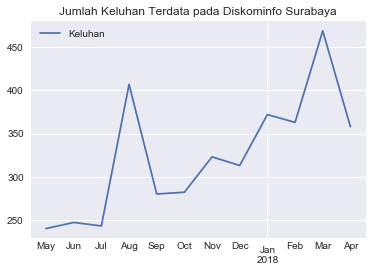

In [12]:
keluhan.resample("M").sum().plot()
plt.title("Jumlah Keluhan Terdata pada Diskominfo Surabaya")
plt.legend()

In [13]:
keluhan_instansi = keluhan.groupby("Instansi").sum()["Keluhan"]

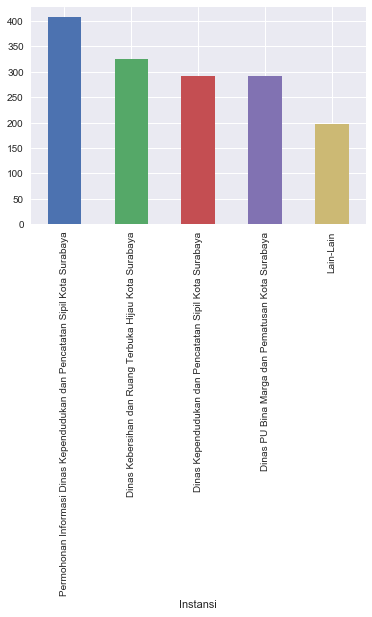

In [14]:
keluhan_instansi.sort_values(ascending=False)[:5].plot(kind="bar")

In [15]:
keluhan.to_csv("../data/keluhan.csv", index=True)

In [16]:
pd.read_csv("../data/keluhan.csv", parse_dates=True, index_col="Tanggal")


,Instansi,Keluhan,Keterangan
Tanggal,,,
2017-05-01,Permohonan Informasi Kecamatan Sukolilo Kota S...,1.0,Jam Operasional Kecamatan di hari sabtu
2017-05-01,Kelurahan Pakis,1.0,e-kios konslet
2017-05-01,Kecamatan Sukolilo Kota Surabaya,1.0,Pelayanan
2017-05-01,Kecamatan Genteng Kota Surabaya,1.0,KTP -el
2017-05-01,Dinas Komunikasi dan Informatika Kota Surabaya,1.0,Wifi di Taman Mati
2017-05-01,Satuan Polisi Pamong Praja Kota Surabaya,2.0,Penertiban Petasan –Penertiban nak-anak bermai...
2017-05-01,Dinas Penanaman Modal dan Pelayanan Terpadu Sa...,2.0,SIUP dan TDP
2017-05-01,Dinas Perumahan Rakyat dan Kawasan\nPermukiman...,2.0,IMB
2017-05-01,Dinas Pengelolaan Bangunan dan Tanah Kota Sura...,2.0,Rusunawa –Status Tanah
